<a href="https://colab.research.google.com/github/valdirdpg/curso-dnc/blob/master/Desafio7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Upload do dataset

from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


#**Análise Exploratória dos Dados**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA





In [4]:
arquivo = '/content/data.csv'

data = pd.read_csv(arquivo, encoding='ISO-8859-1')

data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


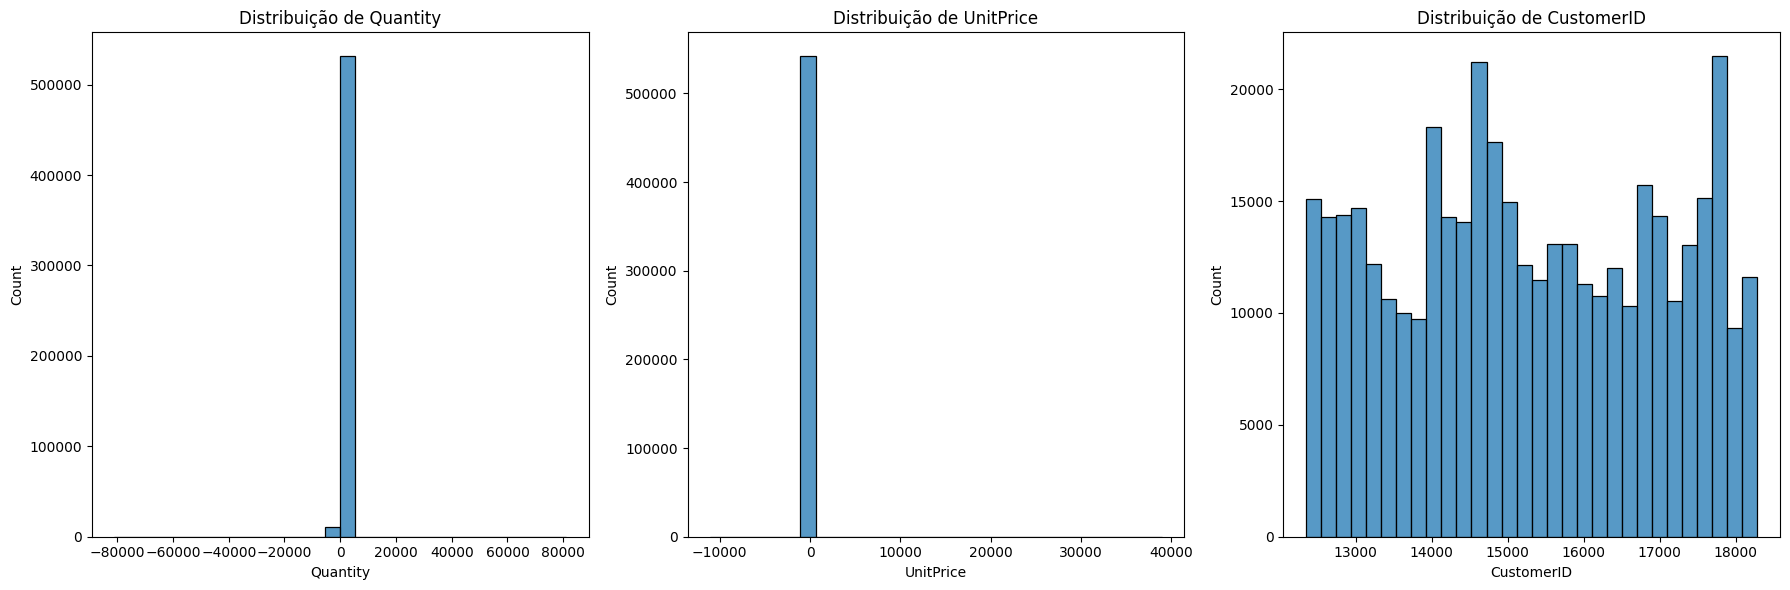

Estatística:             Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000, Nulos: InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64, Duplicados: 5268 None


In [5]:
# Descrição estatística dos dados
descricao_estatistica = data.describe()

# Visualização das distribuições das colunas numéricas
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Histograma da Quantidade
sns.histplot(data['Quantity'], bins=30, ax=ax[0])
ax[0].set_title('Distribuição de Quantity')

# Histograma do UnitPrice
sns.histplot(data['UnitPrice'], bins=30, ax=ax[1])
ax[1].set_title('Distribuição de UnitPrice')

# Histograma do CustomerID
sns.histplot(data['CustomerID'].dropna(), bins=30, ax=ax[2])  # Removendo nulos para a visualização
ax[2].set_title('Distribuição de CustomerID')

plt.tight_layout()

# Verificação de dados nulos, duplicados e outliers
dados_nulos = data.isnull().sum()
dados_duplicados = data.duplicated().sum()

print(f'Estatística: {descricao_estatistica}, Nulos: {dados_nulos}, Duplicados: {dados_duplicados}', plt.show())


#**Pré-processamento dos dados**

In [7]:
# Substituindo valores nulos em 'Description' por uma string vazia
data['Description'].dropna(inplace=True)

# Substituindo valores nulos em 'CustomerID' pelo valor -1 (como um placeholder)
data['CustomerID'].dropna(inplace=True)

# Remoção de dados duplicados
data.drop_duplicates(inplace=True)

# Tratamento de outliers em 'Quantity' e 'UnitPrice'
# Substituindo valores negativos por 0 como um exemplo simples de tratamento
data['Quantity'] = data['Quantity'].apply(lambda x: max(x, 0))
data['UnitPrice'] = data['UnitPrice'].apply(lambda x: max(x, 0))

# Conversão de 'InvoiceDate' em datetime e extração de características relevantes
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Hour'] = data['InvoiceDate'].dt.hour


# Conversão de categorias em valores numéricos
data['InvoiceNo'] = pd.factorize(data['InvoiceNo'])[0]
data['StockCode'] = pd.factorize(data['StockCode'])[0]
data['Description'] = pd.factorize(data['Description'])[0]
data['Country'] = pd.factorize(data['Country'])[0]

# Selecionando apenas as colunas numéricas para normalização
colunas_numericas = data.select_dtypes(include=[np.number]).columns

# Normalização dos dados com MinMaxScaler
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data[colunas_numericas])

# Criando um DataFrame para os dados normalizados
data_normalized = pd.DataFrame(data_normalized, columns=colunas_numericas)

# Visualizando os dados normalizados
data_normalized


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hour
0,0.0,0.000000,0.000237,0.000074,0.000065,0.926443,0.000000,0.0,1.0,0.000000,0.142857
1,0.0,0.000246,0.000474,0.000074,0.000087,0.926443,0.000000,0.0,1.0,0.000000,0.142857
2,0.0,0.000492,0.000710,0.000099,0.000071,0.926443,0.000000,0.0,1.0,0.000000,0.142857
3,0.0,0.000737,0.000947,0.000074,0.000087,0.926443,0.000000,0.0,1.0,0.000000,0.142857
4,0.0,0.000983,0.001184,0.000074,0.000087,0.926443,0.000000,0.0,1.0,0.000000,0.142857
...,...,...,...,...,...,...,...,...,...,...,...
536636,1.0,0.504055,0.477859,0.000148,0.000022,0.056219,0.027027,1.0,1.0,0.266667,0.428571
536637,1.0,0.101991,0.098745,0.000074,0.000054,0.056219,0.027027,1.0,1.0,0.266667,0.428571
536638,1.0,0.810764,0.760597,0.000049,0.000106,0.056219,0.027027,1.0,1.0,0.266667,0.428571
536639,1.0,0.814696,0.762018,0.000049,0.000106,0.056219,0.027027,1.0,1.0,0.266667,0.428571


In [8]:
# Para a frequência de compra, conto o número de faturas únicas por cliente
frequencia_compra = data_normalized.groupby('CustomerID')['InvoiceNo'].nunique()

# Para as categorias de produtos mais compradas, identifiquei o StockCode mais frequente por cliente
categorias_mais_compradas = data_normalized.groupby('CustomerID')['StockCode'].agg(lambda x: x.value_counts().idxmax())

# Para o valor médio da compra, calculo a média do UnitPrice por cliente
valor_medio_compra = data_normalized.groupby('CustomerID')['UnitPrice'].mean()

# Criando um novo DataFrame com essas informações
clientes_analise = pd.DataFrame({
    'FrequenciaCompra': frequencia_compra,
    'CategoriaMaisComprada': categorias_mais_compradas,
    'ValorMedioCompra': valor_medio_compra
}).reset_index()


In [9]:
# Juntando dois dataframes: cliente_analise e data_normalized

data_completo = pd.merge(clientes_analise, data_normalized, on='CustomerID', how='left')
data_completo


,CustomerID,FrequenciaCompra,CategoriaMaisComprada,ValorMedioCompra,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Year,Month,Day,Hour
0,0.000000,2,0.725485,0.000027,0.106143,0.725485,0.685532,0.916291,0.000027,0.000000,1.0,0.000000,0.566667,0.285714
1,0.000000,2,0.725485,0.000027,0.106220,0.725485,0.685532,0.000000,0.000027,0.000000,1.0,0.000000,0.566667,0.285714
2,0.000168,7,0.204964,0.000068,0.027800,0.081347,0.078854,0.000148,0.000054,0.405405,0.0,1.000000,0.200000,0.571429
3,0.000168,7,0.204964,0.000068,0.027800,0.204964,0.197964,0.000049,0.000109,0.405405,0.0,1.000000,0.200000,0.571429
4,0.000168,7,0.204964,0.000068,0.027800,0.280413,0.268766,0.000148,0.000083,0.405405,0.0,1.000000,0.200000,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401599,1.000000,3,0.518309,0.000038,0.762694,0.206193,0.199148,0.000148,0.000011,0.000000,1.0,0.818182,0.366667,0.285714
401600,1.000000,3,0.518309,0.000038,0.762694,0.048415,0.046886,0.000148,0.000054,0.000000,1.0,0.818182,0.366667,0.285714
401601,1.000000,3,0.518309,0.000038,0.815862,0.875154,0.832820,0.000444,0.000032,0.000000,1.0,0.818182,0.900000,0.214286
401602,1.000000,3,0.518309,0.000038,0.815862,0.087491,0.084774,0.000593,0.000010,0.000000,1.0,0.818182,0.900000,0.214286


In [10]:
# Definindo a variável alvo (y) e as características (X) /  avariável alvo foi
# escolhida  mas pela necessidade termos uma para trabalhar, poderia ser outra, mas esta me parece adequada no contexto em estudo
y = data_completo['FrequenciaCompra']
X = data_completo.drop('FrequenciaCompra', axis=1)

# Selecionando as K melhores variáveis (por simplicidade, escolhi 5 variáveis)
k = 5
# Seleção de Variáveis baseada em testes estatísticos univariados (ANOVA F-test).
selector = SelectKBest(f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Obtendo os nomes das colunas selecionadas
colunas_selecionadas = X.columns[selector.get_support()]

colunas_selecionadas.tolist()


['CustomerID', 'CategoriaMaisComprada', 'InvoiceNo', 'Country', 'Month']

In [11]:
# Definindo um limite superior arbitrário para 'FrequenciaCompra' e 'UnitPrice'
limite_frequencia = data_completo['FrequenciaCompra'].quantile(0.99)
limite_unitprice = data_completo['UnitPrice'].quantile(0.99)

# Removendo outliers
data_clean = data_completo[(data_completo['FrequenciaCompra'] <= limite_frequencia) & (data_completo['UnitPrice'] <= limite_unitprice)]

# Removendo duplicatas novamente, caso tenham sido reintroduzidas
data_clean.drop_duplicates(inplace=True)

# Verificação final dos dados
data_description = data_clean.describe()
data_nulls = data_clean.isnull().sum()
data_duplicates = data_clean.duplicated().sum()

data_description, data_nulls, data_duplicates


<ipython-input-11-e6401b3ecceb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.drop_duplicates(inplace=True)


(          CustomerID  FrequenciaCompra  CategoriaMaisComprada  \
 count  397716.000000     397716.000000          397716.000000   
 mean        0.495456         23.206363               0.217165   
 std         0.288061         45.347114               0.272486   
 min         0.000000          1.000000               0.000000   
 25%         0.270998          4.000000               0.030966   
 50%         0.472311          8.000000               0.093881   
 75%         0.748191         18.000000               0.282379   
 max         1.000000        248.000000               1.000000   
 
        ValorMedioCompra      InvoiceNo      StockCode    Description  \
 count     397716.000000  397716.000000  397716.000000  397716.000000   
 mean           0.000086       0.534699       0.342423       0.338404   
 std            0.000476       0.291134       0.315015       0.305608   
 min            0.000000       0.000000       0.000000       0.000237   
 25%            0.000059       0.278852

#**Algoritmo de clusterização**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

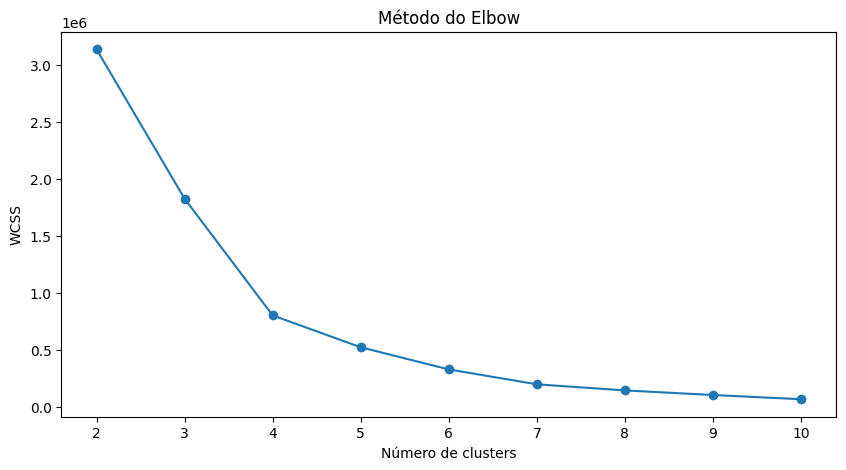

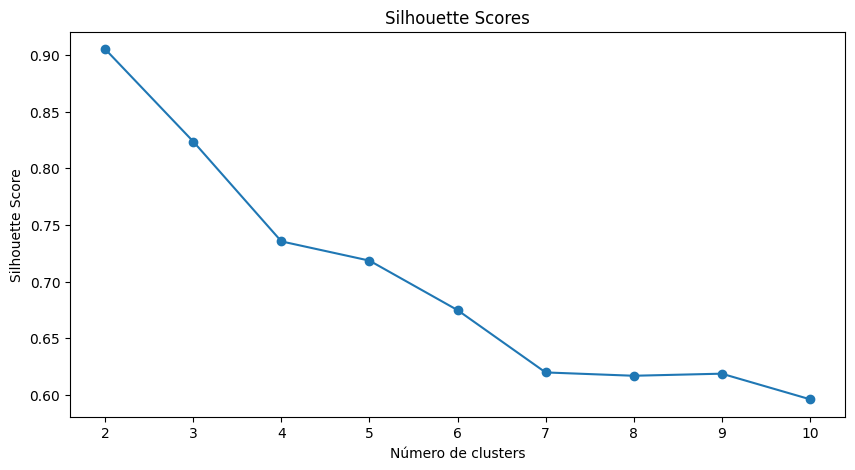

In [12]:
# Devido ao grande número de dados, vou trabalhar com uma amostra aleatória
# Selecionando uma amostra aleatória de 10.000 registros do dataset para a análise
colunas_para_clusterizacao = ['CustomerID', 'FrequenciaCompra','CategoriaMaisComprada', 'InvoiceNo', 'Country', 'Month']
data_sample = data_clean[colunas_para_clusterizacao].dropna().sample(n=10000, random_state=42)

# Método do Elbow para encontrar a quantidade ideal de clusters
wcss = []  # Lista para armazenar a soma dos quadrados dentro dos clusters
silhouette_coefficients = []  # Lista para armazenar os coeficientes de silhueta

# Vamos testar com um número variável de clusters
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_sample)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(data_sample, kmeans.labels_)
    silhouette_coefficients.append(score)

# Gráfico do Método do Elbow
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Método do Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

# Gráfico do Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_coefficients, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.show()


#**Clusters obtidos**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


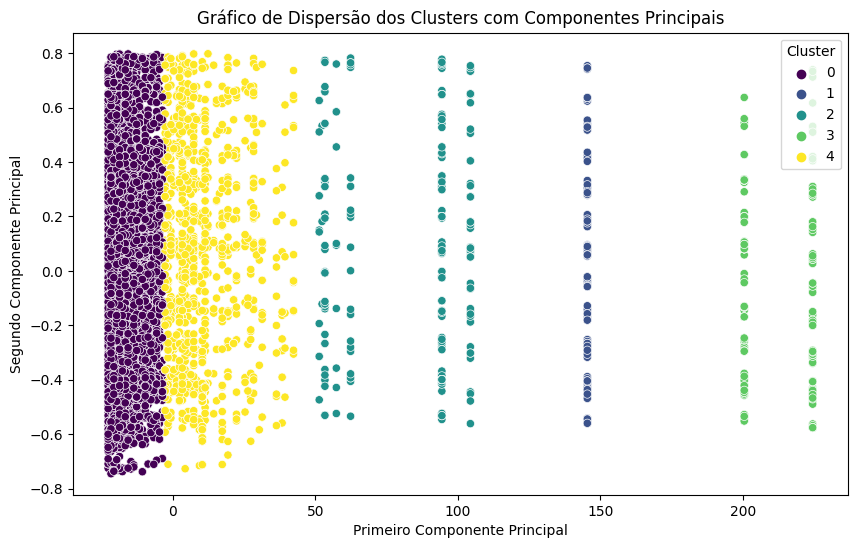

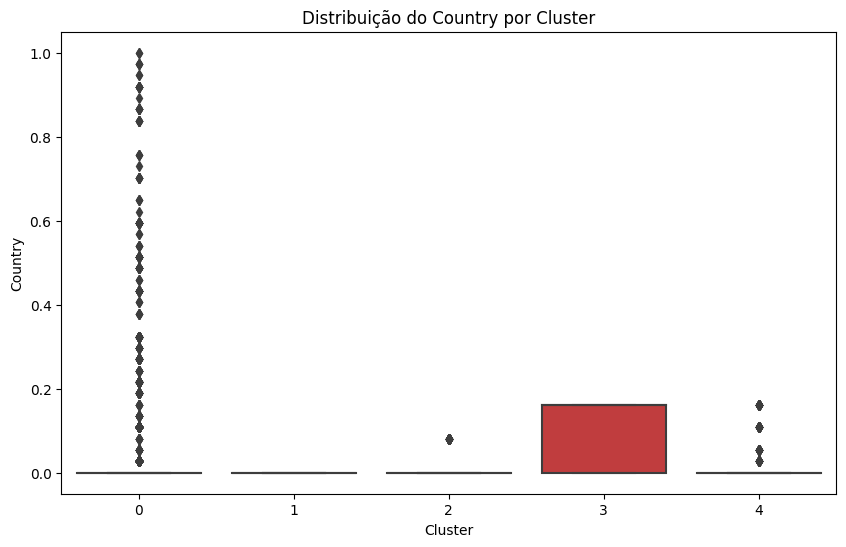

In [13]:


# Aplicar PCA para reduzir a dimensionalidade dos dados para 2 componentes principais

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_sample[colunas_para_clusterizacao])

# Aplicar o K-Means para clusterizar os dados reduzidos
kmeans = KMeans(n_clusters=5, random_state=42)
data_sample['Cluster'] = kmeans.fit_predict(data_pca)

# Adicionar os componentes do PCA ao dataframe para visualização
data_sample['PCA1'] = data_pca[:, 0]
data_sample['PCA2'] = data_pca[:, 1]

# Gráfico de dispersão dos clusters com PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_sample, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Gráfico de Dispersão dos Clusters com Componentes Principais')
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend(title='Cluster')
plt.show()

# Boxplot para analisar a distribuição de 'Country' em cada cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Country', data=data_sample)
plt.title('Distribuição do Country por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Country')
plt.show()


Este boxplot representa a distribuição de um fator codificado numericamente que representa 'Country' (País) entre os diferentes clusters identificados.
A partir deste gráfico, uma empresa poderia inferir que os Clusters 0, 1 e 4 podem ser alvos para estratégias de marketing locais ou regionalizadas, enquanto o Cluster 3 poderia beneficiar-se de abordagens mais globais ou internacionalizadas devido à sua diversidade de países. Seria importante investigar por que o Cluster 2 está ausente ou não possui variação suficiente para formar um boxplot.

#**Interpretação dos resultados obtidos**

A análise de clusterização revelou cinco grupos distintos de clientes. O Cluster 0 pode indicar clientes com alta frequência de compras, enquanto os Clusters 1 e 4 parecem representar compradores esporádicos ou de menor gasto. Os Clusters 2 e 3 sugerem perfis intermediários de comportamento de compra. Insights adicionais poderiam incluir o desenvolvimento de ofertas sazonais direcionadas para o Cluster 2 e 3, que podem ter comportamentos de compra influenciados por eventos ou épocas do ano, e a criação de pacotes de produtos ou serviços para o Cluster 0, visando aumentar o ticket médio de suas já frequentes aquisições.

Esta análise de clusterização é extremamente útil a empresa segmentar seus clientes, pois permite identificar grupos com hábitos de compra distintos, possibilitando a criação de estratégias de marketing altamente personalizadas. Por exemplo, ao reconhecer um cluster de clientes de alta frequência, a empresa pode direcionar programas de fidelidade ou ofertas de recompensa para aumentar a retenção e o valor do tempo de vida do cliente. Para clusters com compras esporádicas ou de menor valor, campanhas de engajamento e incentivos para aumentar a frequência de compras ou o valor médio das compras podem ser eficazes. Ao adaptar a comunicação e as promoções às necessidades e comportamentos específicos de cada cluster, a empresa pode aumentar a satisfação do cliente, a eficácia do marketing e, por fim, os resultados financeiros.